In [1]:
from selenium import webdriver
driver = webdriver.Edge('/edgedriver_win32/msedgedriver.exe')
#
#
#
driver.quit()

C:\Users\Norbert\AppData\Local\Temp\ipykernel_15120\1878787380.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge('/edgedriver_win32/msedgedriver.exe')


In [2]:
#test run
from selenium.webdriver.common.by import By
from selenium import webdriver
import time
driver = webdriver.Edge('/edgedriver_win32/msedgedriver.exe')
driver.get('https://bing.com')

element = driver.find_element(By.ID, 'sb_form_q')
element.send_keys('Pikachu')
element.submit()

time.sleep(5)
driver.quit()

C:\Users\Norbert\AppData\Local\Temp\ipykernel_15120\1401097073.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge('/edgedriver_win32/msedgedriver.exe')


In [3]:
#always run at the start
import praw
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#this too
user_agent = "Scraper 1.0 by /u/python_engineer"
reddit = praw.Reddit (
client_id="dEGxUVfTuIcvcOAx3hB7Vg",
client_secret="QdCwsN8hcuZIHXCZd1PZz4ib4Pfu3g",
user_agent=user_agent
)

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


url: https://www.reddit.com/r/movies/comments/142q0wa/the_flash_review_thread/
Post:  'The Flash' Review Thread


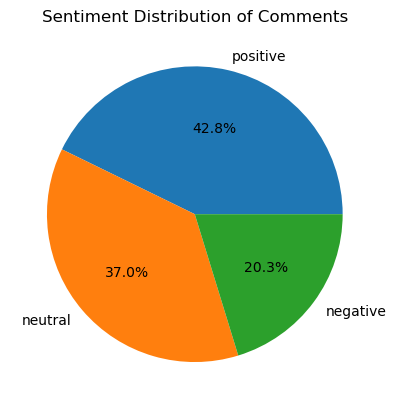

In [12]:
def reddit_comments_sia(url):
    post_url = url
    # Extract the post ID from the URL
    post_id = post_url.split('/comments/')[1].split('/')[0]

    # Get the submission object for the post
    submission = reddit.submission(id=post_id)

    # Retrieve the comments for the post
    comments = []
    scores = []
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        comments.append(comment.body)
        scores.append(comment.score)

    # Join all comments into a single string
    all_comments = ' '.join(comments)

    # Tokenize the comments into words
    tokens = word_tokenize(all_comments)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform sentiment analysis
    sia = SentimentIntensityAnalyzer()
    sentiments = [sia.polarity_scores(comment)['compound'] for comment in comments]
    
    # Categorize sentiments into groups
    categorized_sentiments = []
    for sentiment in sentiments:
        if sentiment > 0.3:
            categorized_sentiments.append('positive')
        elif sentiment < -0.3:
            categorized_sentiments.append('negative')
        else:
            categorized_sentiments.append('neutral')

    # Create DataFrame with comments and categorized sentiments
    df = pd.DataFrame({"Comment": comments, "Sentiment": categorized_sentiments, "Sentiment Value": sentiments, "Score": scores})

    # Calculate the count of each sentiment category
    sentiment_counts = df['Sentiment'].value_counts()
    # Perform text summarization
    #sentences = sent_tokenize(all_comments)
    #summary = ' '.join(sentences[:3])  # Example: Summarize the first three sentences
    print("Post: ", submission.title)
    #print('Summary:', summary)
    # Create a pie chart
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Distribution of Comments')
    #plt.axis('equal')
    plt.show()
    return df

reddit_url = input("url: ")
results_df = reddit_comments_sia(reddit_url)

In [24]:
negatives = results_df[results_df["Sentiment Value"] < -0.8]

In [25]:
results_df["Comment"].iloc[results_df["Score"].idxmax() & results_df["Sentiment Value"] < -0.8]

880

In [32]:
results_df["Comment"].iloc[results_df[results_df["Sentiment Value"] > 0.8]["Score"].idxmax()]

"Obviously only a couple out so far, but I'm surprised that the reaction is pretty lukewarm as it was being heavily hyped and praised on social media."

In [27]:
negatives

,Comment,Sentiment,Sentiment Value,Score
8,i for one am shocked that the movie that's bee...,negative,-0.8257,880
41,"I just saw it. It’s bad, really really bad.\n...",negative,-0.9168,8
93,Fuck Ezra Miller and fuck this movie. \n\nIf t...,negative,-0.8405,3
99,I hated it. I was really confused most of the ...,negative,-0.9574,3
102,Definitely one of the worst superhero movies I...,negative,-0.9612,3
116,Just watched it on some sketchy website and th...,negative,-0.9726,5
187,I'm usually one who believes critics receive t...,negative,-0.9667,6
219,I thought it kinda sucked. WARNING SPOILERS bt...,negative,-0.9848,1
244,"DC trying to copy marvel's , muliverse of madn...",negative,-0.8689,0
272,"For all the production problems, Ezra Miller d...",negative,-0.8074,1


In [5]:
headlines = []
scores = []

# for submission in reddit.subreddit('Pokemon').hot(limit=None):
#     headlines.append(submission.title)
#     scores.append(submission.score)
headlines = []
scores = []
contents = []
image_urls = []
urls = []

limit = 100

for submission in reddit.subreddit('Pokemon').top(time_filter='week', limit=limit):
    headlines.append(submission.title)
    scores.append(submission.score)
    contents.append(submission.selftext)
    urls.append(submission.url)

    if submission.url.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Check if the post is an image
        image_urls.append(submission.url)
    else:
        image_urls.append('')  # Append an empty string if the post is not an image

print(len(headlines))

# Create a DataFrame using headlines, scores, contents, and image_urls
df = pd.DataFrame({'Headline': headlines, 'Score': scores, 'Content': contents, 'Image URL': image_urls, 'URL':urls})

100


In [6]:
df

,Headline,Score,Content,Image URL,URL
0,Choose wisely,16064,,https://i.redd.it/uagfsmxc3r1b1.jpg,https://i.redd.it/uagfsmxc3r1b1.jpg
1,I've been drawing little Pokemon dioramas,9678,,,https://www.reddit.com/gallery/13shu2t
2,Imfinity,7548,,https://i.redd.it/sx678tju2k1b1.png,https://i.redd.it/sx678tju2k1b1.png
3,Do people still like mudkip?,6354,,https://i.redd.it/5co1o431wt1b1.jpg,https://i.redd.it/5co1o431wt1b1.jpg
4,"When ""Fairy"" doesn't just mean ""pink/cute/smal...",5997,,https://i.redd.it/0vk1ls2ryl1b1.png,https://i.redd.it/0vk1ls2ryl1b1.png
...,...,...,...,...,...
95,This was my final team on Pokémon Sword. I dre...,107,,https://i.redd.it/e3wq4p3srl1b1.jpg,https://i.redd.it/e3wq4p3srl1b1.jpg
96,I lost all my pokemon save data.,105,"My switch decided to stop working, everytime I...",,https://www.reddit.com/r/pokemon/comments/13t9...
97,Snow Leopard Glaceon [oc],106,,https://i.redd.it/ozh7jls6z12b1.jpg,https://i.redd.it/ozh7jls6z12b1.jpg
98,Hug it!,105,,https://i.redd.it/3clhg9h6tq2b1.png,https://i.redd.it/3clhg9h6tq2b1.png


In [31]:

# headlines = []
# scores = []
# contents = []
# comments = []

# limit = 10  # Specify the desired limit

# for submission in reddit.subreddit('Pokemon').top(time_filter='week', limit=limit):
#     headlines.append(submission.title)
#     scores.append(submission.score)
#     contents.append(submission.selftext)

#     submission_comments = []
#     submission.comments.replace_more(limit=None)  # Retrieve all comments (including nested ones)
#     for comment in submission.comments.list():
#         submission_comments.append(comment.body)
#     comments.append(submission_comments)

# print(len(headlines))

# # Create a DataFrame using headlines, scores, contents, and comments
# df = pd.DataFrame({'Headline': headlines, 'Score': scores, 'Content': contents, 'Comments': comments})


10


In [32]:
df

,Headline,Score,Content,Comments
0,Choose wisely,16064,,[A new console will eventually become obsolete...
1,I've been drawing little Pokemon dioramas,9685,,[These are great! I love how you’ve incorporat...
2,Imfinity,7539,,"[Ah look, it's my favourite Z-move: ""Let's str..."
3,Do people still like mudkip?,6363,,"[I always lieked mudkip, U liek Mudkipz? Final..."
4,"When ""Fairy"" doesn't just mean ""pink/cute/smal...",6003,,[The only Pokémon that I feel really missed ou...
5,[OC] Mecha AB-50L Mega,5053,,"[Metal gear absol, Great. Now I want a future ..."
6,I modelled the Substitute Doll in a Minecraft ...,5026,,[Looks a lot like Pokémon Quest if you ask me....
7,[OC] Here’s a letter swap challenge i did for ...,3698,,"[I LOVE THIS, here are some dex entries idea's..."
8,I’ve noticed this glitch with Florges outbreak...,2910,"Zoura, Ditto, and Zourark outbreaks are glitch...","[It’s an intimidation tactic, lol, “BE NOT AFR..."
9,Octillery paradox form [OC],3096,,[I love the reference to Octillery’s beta desi...


In [34]:
len(comments)

10

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Norbert\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Norbert\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Norbert\AppData\Roaming\nltk_data...


True

In [4]:
#sentiment analysis of comments in a post
import pandas as pd
import matplotlib.pyplot as plt
# Create a Reddit instance

# Example Reddit post URL
post_url = 'https://www.reddit.com/r/Philippines/comments/152k54j/breaking_president_ferdinand_marcos_jr_signs_into/'

# Extract the post ID from the URL
post_id = post_url.split('/comments/')[1].split('/')[0]

# Get the submission object for the post
submission = reddit.submission(id=post_id)

# Retrieve the comments for the post
comments = []
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    comments.append(comment.body)

# Join all comments into a single string
all_comments = ' '.join(comments)

# Tokenize the comments into words
tokens = word_tokenize(all_comments)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(comment)['compound'] for comment in comments]

# Calculate frequency distribution of words
freq_dist = FreqDist(filtered_tokens)

# Get most common words
most_common_words = freq_dist.most_common(10)

# Perform text summarization
sentences = sent_tokenize(all_comments)
summary = ' '.join(sentences[:3])  # Example: Summarize the first three sentences

# Print the summary, sentiment scores, and most common words
print("Post: ", submission.title)
print('Summary:', summary)
# print('Sentiments:', sentiments)
# print('Most Common Words:', most_common_words)
df = pd.DataFrame({"Comment": comments, "Sentiment":sentiments})


Post:  BREAKING. President Ferdinand Marcos Jr. signs into law on Tuesday, July 18, the measure creating the controversial Maharlika Investment Fund.
Summary: Good luck Philippines. Legal na ang scams. Legal na ang corruption.


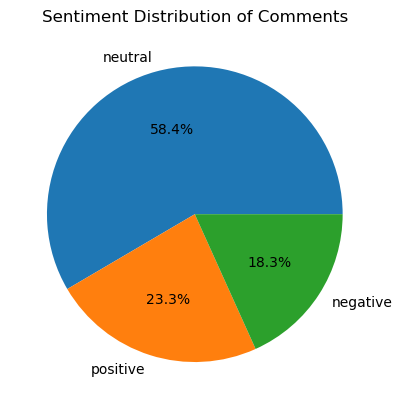

In [5]:
# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(comment)['compound'] for comment in comments]

# Categorize sentiments into groups
categorized_sentiments = []
for sentiment in sentiments:
    if sentiment > 0.3:
        categorized_sentiments.append('positive')
    elif sentiment < -0.3:
        categorized_sentiments.append('negative')
    else:
        categorized_sentiments.append('neutral')

# Create DataFrame with comments and categorized sentiments
df = pd.DataFrame({"Comment": comments, "Sentiment": categorized_sentiments, "Sentiment Value": sentiments})

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution of Comments')
#plt.axis('equal')
plt.show()

In [6]:
df[df["Sentiment Value"] < -0.3]

,Comment,Sentiment,Sentiment Value
6,I hope we can opt out on this shit. Taxes are ...,negative,-0.6428
8,What do you expect from a worthless piece of s...,negative,-0.7579
9,"So we're fucked now, aren't we?",negative,-0.6887
12,In theory this is a great help if executed rig...,negative,-0.6196
13,goodluck nalang pelepens 🤦🏻‍♂️ expect na magin...,negative,-0.5719
...,...,...,...
487,"Mm, I agree. A rural development fund was one ...",negative,-0.7351
497,Hmmm. I may be wrong in my understanding becau...,negative,-0.4767
504,U pay ur taxes because u have no choice. Pero ...,negative,-0.7269
510,Hindi dapat ninonormalize ang bad behavior bro...,negative,-0.7906


In [36]:
df["Comment"].iloc[9]

"I'm not a very creative person so I was happy with the very simple system and to just have the option to do it. But damn, is just a big oversight to not have 1x1 blocks and not be able to remove/add walls. Making a house with all the walls closed was the real puzzle of the game lmao. \n\nAlso, I hate that we are isolated instead of having a plot within the town, I want to be the friendly neighbour Link, not the rich asshole living at the top of a hill :("